In [1]:
#Import packages
import geopandas as gpd
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load shapefile
TestPoints = gpd.read_file("CapeEgmont_TEST_intersect2.shp")

#View shapefile table
TestPoints

,OBJECTID,TransectID,TransOrder,BaselineID,ShorelineI,Distance,IntersectX,IntersectY,Uncertaint,AOI,geometry
0,694,177,177,1,19/09/1955,11.059271,1.664816e+06,5.652014e+06,3.206634,CapeEgmont,POINT (1664816.274 5652014.454)
1,695,177,177,1,08/11/1970,9.226497,1.664818e+06,5.652014e+06,3.470649,CapeEgmont,POINT (1664818.097 5652014.267)
2,696,177,177,1,11/02/2017,6.706946,1.664821e+06,5.652014e+06,2.091626,CapeEgmont,POINT (1664820.603 5652014.011)
3,697,177,177,1,05/12/2020,5.195157,1.664822e+06,5.652014e+06,2.400562,CapeEgmont,POINT (1664822.107 5652013.857)
4,698,178,178,1,19/09/1955,10.972691,1.664816e+06,5.652004e+06,3.206634,CapeEgmont,POINT (1664815.895 5652003.931)
5,699,178,178,1,08/11/1970,9.455830,1.664817e+06,5.652004e+06,3.470649,CapeEgmont,POINT (1664817.410 5652003.850)
6,700,178,178,1,11/02/2017,7.331568,1.664820e+06,5.652004e+06,2.091626,CapeEgmont,POINT (1664819.531 5652003.737)
7,701,178,178,1,05/12/2020,6.193758,1.664821e+06,5.652004e+06,2.400562,CapeEgmont,POINT (1664820.667 5652003.677)


In [3]:
#Adding a new column with 1950 as the base date for all
TestPoints['BaseDate']= '1/1/1950'
TestPoints['BaseDate']=pd.to_datetime(TestPoints['BaseDate'])

#Adding new column and converts to datetime
TestPoints['Date']=pd.to_datetime(TestPoints['ShorelineI'])

# Finding the number of days between base date 1950 and the respective row date
TestPoints['ElapsedTime']=TestPoints.Date - TestPoints.BaseDate

#Adding another row with Date in 2100
TestPoints['to2100']='1/1/2100'

#Convert to datetime
TestPoints['to2100']=pd.to_datetime(TestPoints['to2100'])

#Finding number of days to 2100
TestPoints['Future'] = TestPoints.to2100 - TestPoints.Date

C:\Users\lalit\AppData\Local\Temp\ipykernel_11156\1209900260.py:6: UserWarning: Parsing '19/09/1955' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  TestPoints['Date']=pd.to_datetime(TestPoints['ShorelineI'])


In [4]:
#View top of shaefile table
TestPoints.head(8)

,OBJECTID,TransectID,TransOrder,BaselineID,ShorelineI,Distance,IntersectX,IntersectY,Uncertaint,AOI,geometry,BaseDate,Date,ElapsedTime,to2100,Future
0,694,177,177,1,19/09/1955,11.059271,1.664816e+06,5.652014e+06,3.206634,CapeEgmont,POINT (1664816.274 5652014.454),1950-01-01,1955-09-19,2087 days,2100-01-01,52700 days
1,695,177,177,1,08/11/1970,9.226497,1.664818e+06,5.652014e+06,3.470649,CapeEgmont,POINT (1664818.097 5652014.267),1950-01-01,1970-08-11,7527 days,2100-01-01,47260 days
2,696,177,177,1,11/02/2017,6.706946,1.664821e+06,5.652014e+06,2.091626,CapeEgmont,POINT (1664820.603 5652014.011),1950-01-01,2017-11-02,24777 days,2100-01-01,30010 days
3,697,177,177,1,05/12/2020,5.195157,1.664822e+06,5.652014e+06,2.400562,CapeEgmont,POINT (1664822.107 5652013.857),1950-01-01,2020-05-12,25699 days,2100-01-01,29088 days
4,698,178,178,1,19/09/1955,10.972691,1.664816e+06,5.652004e+06,3.206634,CapeEgmont,POINT (1664815.895 5652003.931),1950-01-01,1955-09-19,2087 days,2100-01-01,52700 days
5,699,178,178,1,08/11/1970,9.455830,1.664817e+06,5.652004e+06,3.470649,CapeEgmont,POINT (1664817.410 5652003.850),1950-01-01,1970-08-11,7527 days,2100-01-01,47260 days
6,700,178,178,1,11/02/2017,7.331568,1.664820e+06,5.652004e+06,2.091626,CapeEgmont,POINT (1664819.531 5652003.737),1950-01-01,2017-11-02,24777 days,2100-01-01,30010 days
7,701,178,178,1,05/12/2020,6.193758,1.664821e+06,5.652004e+06,2.400562,CapeEgmont,POINT (1664820.667 5652003.677),1950-01-01,2020-05-12,25699 days,2100-01-01,29088 days


In [5]:
# New DataFrame with only latest X/Y coordinates for TestPoints
TestPoints_latest = TestPoints.sort_values('Date', ascending = False)
TestPoints_latest = TestPoints_latest.drop_duplicates('TransectID')

TestPoints_latest

,OBJECTID,TransectID,TransOrder,BaselineID,ShorelineI,Distance,IntersectX,IntersectY,Uncertaint,AOI,geometry,BaseDate,Date,ElapsedTime,to2100,Future
3,697,177,177,1,05/12/2020,5.195157,1.664822e+06,5.652014e+06,2.400562,CapeEgmont,POINT (1664822.107 5652013.857),1950-01-01,2020-05-12,25699 days,2100-01-01,29088 days
7,701,178,178,1,05/12/2020,6.193758,1.664821e+06,5.652004e+06,2.400562,CapeEgmont,POINT (1664820.667 5652003.677),1950-01-01,2020-05-12,25699 days,2100-01-01,29088 days


In [6]:
# To view what format each variable is in and converting ElapsedTime to seconds
TestPoints['ElapsedTimeSeconds'] = TestPoints['ElapsedTime'].dt.total_seconds().astype(float)

print(TestPoints.dtypes)

OBJECTID                        int64
TransectID                      int64
TransOrder                      int64
BaselineID                      int64
ShorelineI                     object
Distance                      float64
IntersectX                    float64
IntersectY                    float64
Uncertaint                    float64
AOI                            object
geometry                     geometry
BaseDate               datetime64[ns]
Date                   datetime64[ns]
ElapsedTime           timedelta64[ns]
to2100                 datetime64[ns]
Future                timedelta64[ns]
ElapsedTimeSeconds            float64
dtype: object


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
dates = pd.to_datetime(TestPoints['Date'])  # Replace with your date values
distances = np.array(TestPoints['Distance'])  # Replace with your distance values

# Convert datetime to numerical values (days since a reference date)
reference_date = pd.to_datetime('1950-01-01')
numerical_dates = (dates - reference_date).dt.days

# Group data by Transect ID
grouped = TestPoints.groupby('TransectID')

# Perform linear regression for each group
results = []
for group_name, group_data in grouped:
    # Convert datetime to numerical values (days since a reference date)
    group_data['NumericalDate'] = (group_data['Date'] - reference_date).dt.days
    
    coefficients = np.polyfit(group_data['NumericalDate'], group_data['Distance'], 1)
    slope = coefficients[0]
    intercept = coefficients[1]
    
    #Bray and Hooke relationship inputs  
    Historic_SLR = 0.002
    Proj_SLR = 0.01
    Length_AP = 5000
    Prop = 0.1
    B_Height = 20
    C_Depth = 10
    
    #Bray and Hooke relationship
    X = Prop * (B_Height + C_Depth)
    Y = Length_AP/X
    Z = (Proj_SLR - Historic_SLR) * Y
    Proj_RR = slope + Z
    
    # Calculate the predicted distance for the target date (2100-01-01)
    numerical_target_date = (pd.to_datetime('2100-01-01') - reference_date).days
    predicted_distance_target = Proj_RR * numerical_target_date + intercept

    results.append({
        'TransectID': group_name,
        'Historic reccession rate = Slope': slope,
        'Intercept': intercept,
        'X': X,
        'Y': Y,
        'Z': Z,
        'Proj_RR': Proj_RR,
        'PredictedDistance': predicted_distance_target
        
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

   TransectID  Historic reccession rate = Slope  Intercept    X       Y    Z  \
0         177                         -0.000211  11.217992  5.0  1000.0  8.0   
1         178                         -0.000174  11.098533  5.0  1000.0  8.0   

    Proj_RR  PredictedDistance  
0  7.999789      438295.653278  
1  7.999826      438297.579614  


Transect 177 - Distance difference: 438291.9057546688
Transect 178 - Distance difference: 438290.9461312357


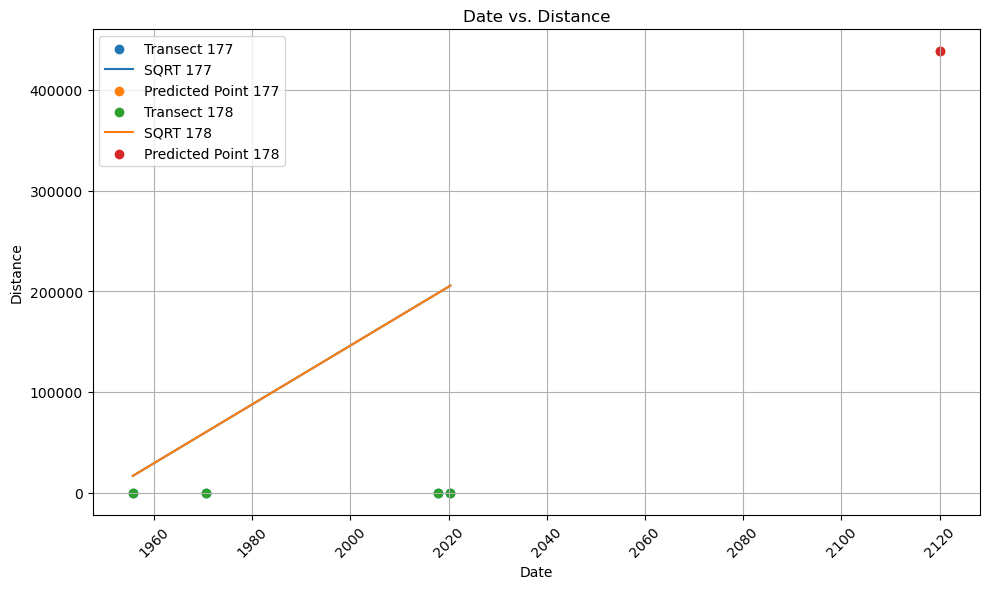

In [11]:
# Calculate the absolute difference between the predicted distances and the old distances for each Transect ID
plt.figure(figsize=(10, 6))

for group_name, group_data in grouped:
    
    # Convert datetime to numerical values (days since a reference date)
    group_data['NumericalDate'] = (group_data['Date'] - reference_date).dt.days
    
    coefficients = np.polyfit(group_data['NumericalDate'], group_data['Distance'], 1)
    slope = coefficients[0]
    intercept = coefficients[1]
    
    # Calculate the predicted distance for the last old data point's date
    last_old_date = group_data['Date'].max()
    numerical_last_old_date = (last_old_date - reference_date).days
    predicted_distance_last_old = slope * numerical_last_old_date + intercept

    # Calculate the predicted distance for the target date
    numerical_target_date = (pd.to_datetime('2100-01-01') - reference_date).days
    predicted_distance_target = Proj_RR * numerical_target_date + intercept

    # Calculate the absolute difference between the predicted distances
    distance_difference = abs(predicted_distance_last_old - predicted_distance_target)

    plt.scatter(group_data['Date'], group_data['Distance'], label=f'Transect {group_name}')
    plt.plot(group_data['Date'], Proj_RR * group_data['NumericalDate'] + intercept, label=f'Bray_Hooke {group_name}')
    plt.scatter(numerical_target_date, predicted_distance_target, label=f'Predicted Point {group_name}')

    print(f"Transect {group_name} - Distance difference: {distance_difference}")

plt.xlabel('Date')
plt.ylabel('Distance')
plt.title('Date vs. Distance')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [12]:
print(group_data.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4 entries, 4 to 7
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   OBJECTID            4 non-null      int64          
 1   TransectID          4 non-null      int64          
 2   TransOrder          4 non-null      int64          
 3   BaselineID          4 non-null      int64          
 4   ShorelineI          4 non-null      object         
 5   Distance            4 non-null      float64        
 6   IntersectX          4 non-null      float64        
 7   IntersectY          4 non-null      float64        
 8   Uncertaint          4 non-null      float64        
 9   AOI                 4 non-null      object         
 10  geometry            4 non-null      geometry       
 11  BaseDate            4 non-null      datetime64[ns] 
 12  Date                4 non-null      datetime64[ns] 
 13  ElapsedTime         4 non-null 

In [13]:
import geopandas as gpd
from shapely.geometry import LineString

# Replace 'path_to_shapefile' with the actual path to your shapefile
shapefile_path = 'CapeEgmont_TEST_Line2.shp'
TransectLine = gpd.read_file(shapefile_path)

#Line shapefiles have azimuth 
TransectLine

,OBJECTID,TransectID,BaselineID,GroupID,TransOrder,Azimuth,ShrCount,TCD,SHAPE_Leng,SCE,...,EPRunc,LRR,LR2,LSE,LCI95_5,WLR,WR2,WSE,WCI95_5,geometry
0,175,177,1,0,177,95.85,4,1790.0,11.059271,5.86,...,0.06,-0.08,0.95,0.70,0.06,-0.08,0.93,0.29,0.07,"LINESTRING (1664816.274 5652014.454, 1664827.2..."
1,176,178,1,0,178,93.04,4,1800.0,10.972667,4.78,...,0.06,-0.06,0.96,0.53,0.04,-0.06,0.94,0.22,0.05,"LINESTRING (1664815.895 5652003.931, 1664826.8..."


In [15]:
import math

def calculate_new_coordinates(old_x, old_y, bearing, distance):
    bearing_radians = math.radians(bearing)
    new_x = old_x + (distance * math.sin(bearing_radians))
    new_y = old_y + (distance * math.cos(bearing_radians))
    return new_x, new_y

# Calculate New X/Y coordinates for each Transect
new_TransectLine = TransectLine[['TransectID', 'Azimuth']]
new_TransectLine = new_TransectLine.merge(TestPoints_latest[['TransectID', 'IntersectX', 'IntersectY']], on = 'TransectID')

new_TransectLine[['NewX', 'NewY']] = new_TransectLine.apply(lambda row: calculate_new_coordinates(row['IntersectX'],
                                                                                                 row['IntersectY'],
                                                                                                 row['Azimuth'],
                                                                                                 distance_difference),
                                                           axis = 1,
                                                           result_type = 'expand')

new_TransectLine = new_TransectLine.sort_values('TransectID', ascending = True)
new_TransectLine

,TransectID,Azimuth,IntersectX,IntersectY,NewX,NewY
0,177,95.85,1.664822e+06,5.652014e+06,2.100830e+06,5.607341e+06
1,178,93.04,1.664821e+06,5.652004e+06,2.102495e+06,5.628760e+06


<AxesSubplot:>

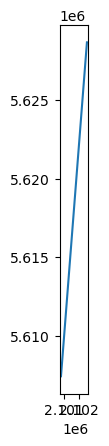

In [16]:
# Convert Dataframe to geodataframe
new_TransectLine = gpd.GeoDataFrame(new_TransectLine, geometry = gpd.points_from_xy(new_TransectLine.NewX, 
                                                                       new_TransectLine.NewY),
                                    crs = 'EPSG:2193').rename(columns = {'geometry': 'from_point'})
# Get from and to points
new_TransectLine['to_point'] = new_TransectLine.from_point.shift(-1)
new_TransectLine.loc[new_TransectLine["to_point"].isna(), "to_point"] = new_TransectLine["from_point"]

# Get Line geometry between points
new_TransectLine['geometry'] = new_TransectLine.apply(lambda row: LineString([row['from_point'], row['to_point']]),
                                                 axis = 1)
new_TransectLine.plot()

In [ ]:
#Add code to nake line into polygon extending 500m out to the left

In [ ]:
#Export polygon as shapefile and add to projected shoreline polygons folder 

new_df = new_TransectLine[['TransectID','Azimuth','geometry']]
new_df.to_file('Projected_Shoreline_Polygons/AOIname_BrayHooke.shp')

print("Shapefile exported successfully!")